In [4]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score, confusion_matrix, r2_score, roc_auc_score, roc_curve,classification_report



import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression

from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier

from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier

from sklearn import neighbors
from sklearn.svm import SVR

from sklearn.ensemble import GradientBoostingClassifier

from warnings import filterwarnings
filterwarnings("ignore")

from xgboost import XGBClassifier

In [3]:
df = pd.read_csv("/content/diabetes.csv")
df.head()
X=df.drop(columns=["Outcome"])
y = df["Outcome"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [5]:
xgb_model = XGBClassifier().fit(X_train,y_train)

In [14]:
?xgb_model

In [13]:
y_prd = xgb_model.predict(X_test)
accuracy_score(y_test,y_prd)

0.6883116883116883

In [ ]:
# Model Tunning

xgb_params = {"n_estimators":[100,500,1000],
              "subsample":[0.6,0.8,1],
              "max_depth":[3,5,7],
              "learning_rate":[0.1,0.001,0.01]}

xgb_cv_model = GridSearchCV(xgb_model,xgb_params,cv = 10,n_jobs=-1,verbose=2).fit(X_train,y_train) #Takes too much time :/

In [ ]:
xgb_cv_model.best_params_ 

In [16]:
xgb_tuned = XGBClassifier(learning_rate=0.001,
                          max_depth=7,
                          n_estimators=500,
                          subsample=0.6)

In [17]:
xgb_tuned_model = xgb_tuned.fit(X_train,y_train)
y_pred = xgb_tuned_model.predict(X_test)
accuracy_score(y_pred,y_test)

0.7662337662337663

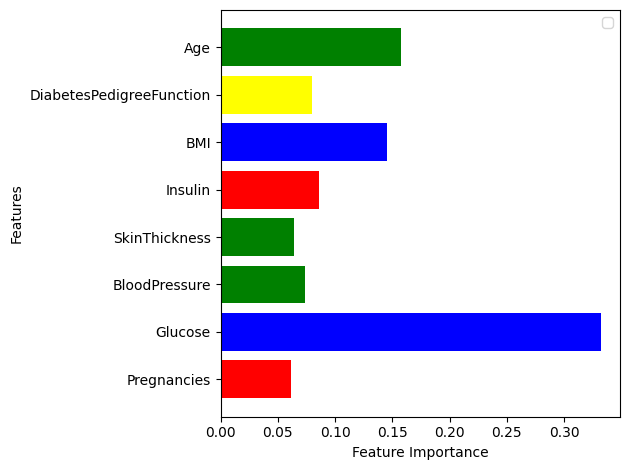

In [26]:
plt.barh(X_train.columns,xgb_tuned_model.feature_importances_,color=["r","b","green","g","r","b","yellow","green"])
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.legend()
plt.tight_layout()
plt.show()